# COVID-19

In [1]:
# Importing required libraries
import json
import requests
import pprint
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [2]:
# Getting and formatting data
data = json.loads(requests.get("https://pomber.github.io/covid19/timeseries.json").text)
country_names = list(data.keys())
column_names = []
column_names.append('country')
json_keys = list(data['Afghanistan'][0].keys())
column_names.extend(json_keys)
data_pd = pd.DataFrame(columns = column_names)
date_list = []
confirmed_list = []
deaths_list = []
recovered_list = []
country_list = []
for country in country_names:
  for item in list(data[country]):
    country_list.append(country)
    date_list.append(item['date'])
    confirmed_list.append(item['confirmed'])
    deaths_list.append(item['deaths'])
    recovered_list.append(item['recovered'])
data_pd['country'] = country_list
data_pd['date'] = date_list
data_pd['confirmed'] = confirmed_list
data_pd['deaths'] = deaths_list
data_pd['recovered'] = recovered_list
data_pd.tail()

,country,date,confirmed,deaths,recovered
27443,Lesotho,2020-6-11,4,0,2
27444,Lesotho,2020-6-12,4,0,2
27445,Lesotho,2020-6-13,4,0,2
27446,Lesotho,2020-6-14,4,0,2
27447,Lesotho,2020-6-15,4,0,2


In [3]:
data_pd.columns

Index(['country', 'date', 'confirmed', 'deaths', 'recovered'], dtype='object')

In [4]:
print(data_pd.shape)

(27448, 5)


In [5]:
print(data_pd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27448 entries, 0 to 27447
Data columns (total 5 columns):
country      27448 non-null object
date         27448 non-null object
confirmed    27448 non-null int64
deaths       27448 non-null int64
recovered    27448 non-null int64
dtypes: int64(3), object(2)
memory usage: 1.0+ MB
None


In [6]:
data_pd.describe()

,confirmed,deaths,recovered
count,2.744800e+04,27448.000000,27448.00000
mean,1.187249e+04,744.625291,4469.08139
std,8.008981e+04,5179.726433,24661.26704
min,0.000000e+00,0.000000,0.00000
25%,0.000000e+00,0.000000,0.00000
50%,5.200000e+01,1.000000,7.00000
75%,1.389500e+03,28.000000,348.00000
max,2.114026e+06,116127.000000,576334.00000


In [7]:
# Kenyan data
df_kenya = data_pd[data_pd['country'] == 'Kenya']
df_kenya.head(20)

,country,date,confirmed,deaths,recovered
11972,Kenya,2020-1-22,0,0,0
11973,Kenya,2020-1-23,0,0,0
11974,Kenya,2020-1-24,0,0,0
11975,Kenya,2020-1-25,0,0,0
11976,Kenya,2020-1-26,0,0,0
11977,Kenya,2020-1-27,0,0,0
11978,Kenya,2020-1-28,0,0,0
11979,Kenya,2020-1-29,0,0,0
11980,Kenya,2020-1-30,0,0,0
11981,Kenya,2020-1-31,0,0,0


In [8]:
df_kenya.columns

Index(['country', 'date', 'confirmed', 'deaths', 'recovered'], dtype='object')

In [9]:
df_kenya["date"]

11972    2020-1-22
11973    2020-1-23
11974    2020-1-24
11975    2020-1-25
11976    2020-1-26
           ...    
12113    2020-6-11
12114    2020-6-12
12115    2020-6-13
12116    2020-6-14
12117    2020-6-15
Name: date, Length: 146, dtype: object

In [10]:
# Finding daily data
c = list(df_kenya['confirmed'])
c_new = [c[0]]
d = list(df_kenya['deaths'])
d_new = [d[0]]
r = list(df_kenya['recovered'])
r_new = [r[0]]

for a,b in zip(c,c[1:]):
    c_new.append(b-a)
for a,b in zip(d,d[1:]):
    d_new.append(b-a)
for a,b in zip(r,r[1:]):
    r_new.append(b-a)

df_kenya.loc[:,'date'] = pd.to_datetime(df_kenya['date']) # covert date column to type column
df_kenya['daily_confirmed'] = c_new
df_kenya['daily_deaths'] = d_new
df_kenya['daily_recoveries'] = r_new
df_kenya = df_kenya.set_index('date')
#data_pd.sort_values(by=['country'],inplace=True)
df_kenya.head(20)

C:\Users\Cheye\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Cheye\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Cheye\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

,country,confirmed,deaths,recovered,daily_confirmed,daily_deaths,daily_recoveries
date,,,,,,,
2020-01-22,Kenya,0,0,0,0,0,0
2020-01-23,Kenya,0,0,0,0,0,0
2020-01-24,Kenya,0,0,0,0,0,0
2020-01-25,Kenya,0,0,0,0,0,0
2020-01-26,Kenya,0,0,0,0,0,0
2020-01-27,Kenya,0,0,0,0,0,0
2020-01-28,Kenya,0,0,0,0,0,0
2020-01-29,Kenya,0,0,0,0,0,0
2020-01-30,Kenya,0,0,0,0,0,0


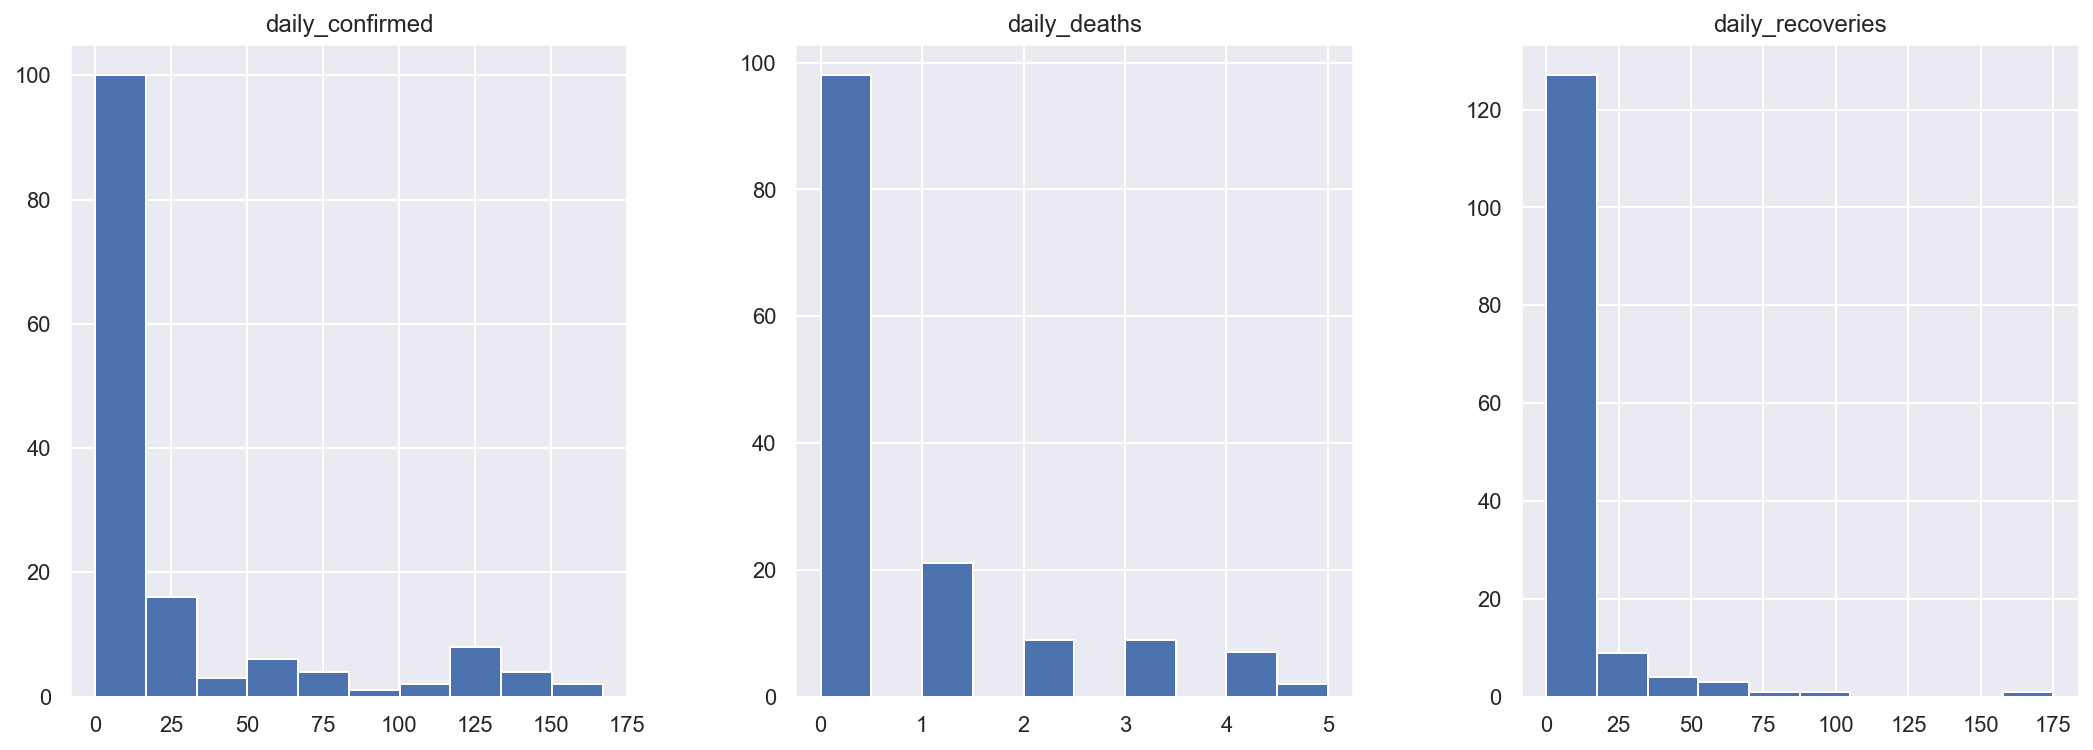

In [11]:
features = ['daily_confirmed','daily_deaths','daily_recoveries']
df_kenya[features].hist(figsize=(18,6),layout=(1, 3));

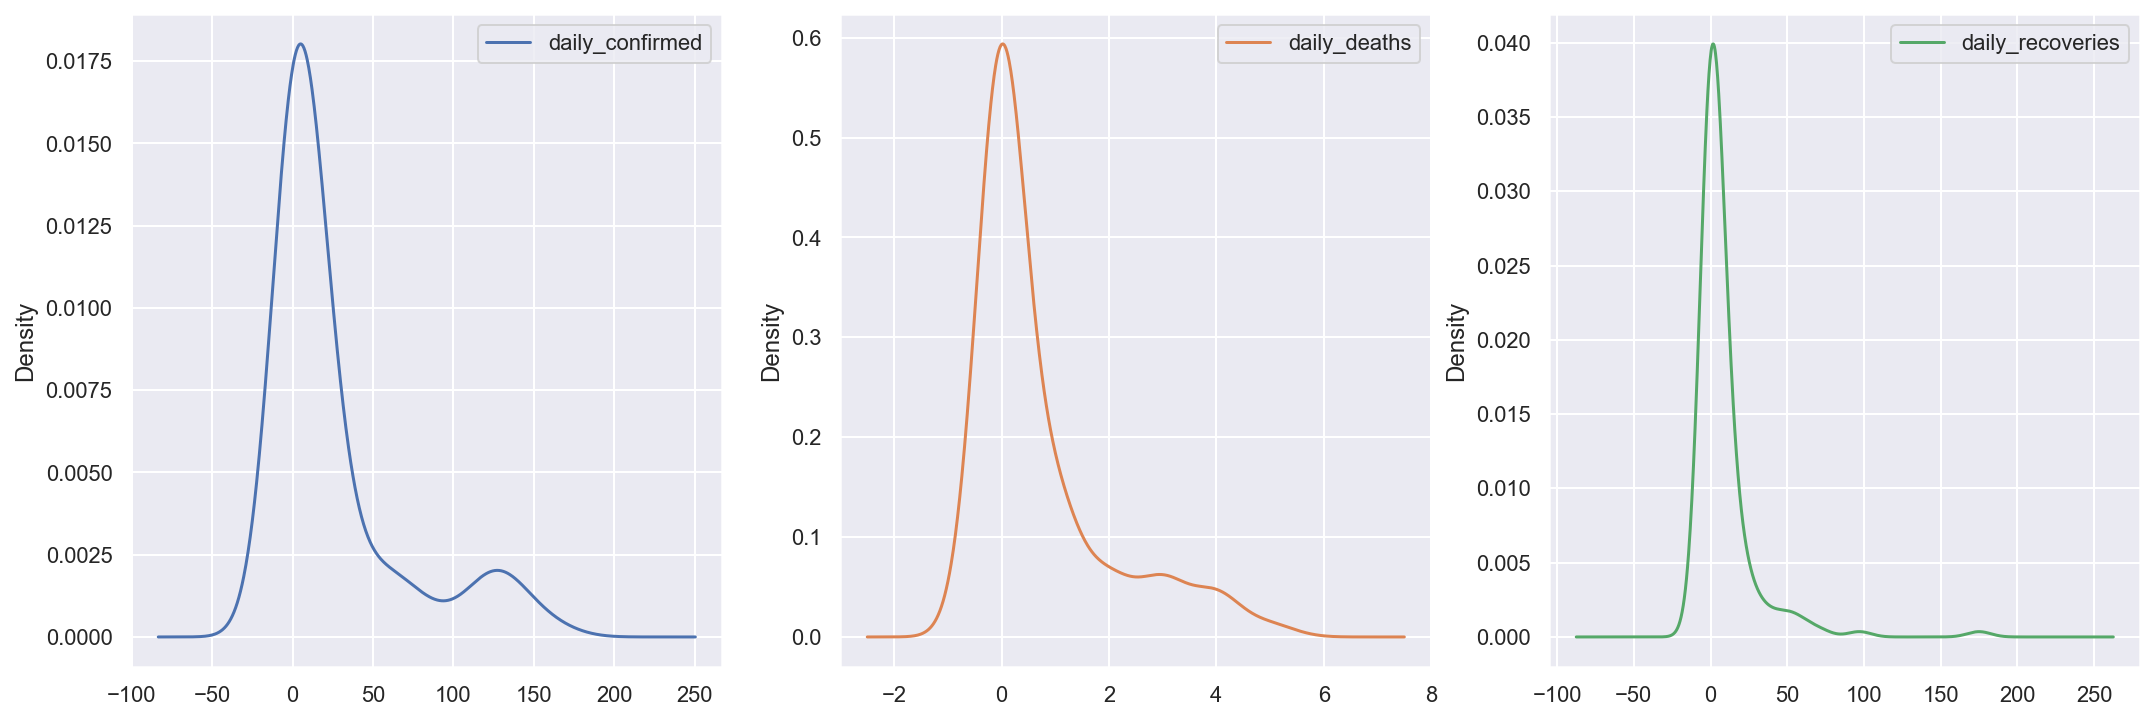

In [12]:
df_kenya[features].plot(kind='density', subplots=True, layout=(1, 3), 
                  sharex=False, figsize=(18, 6));

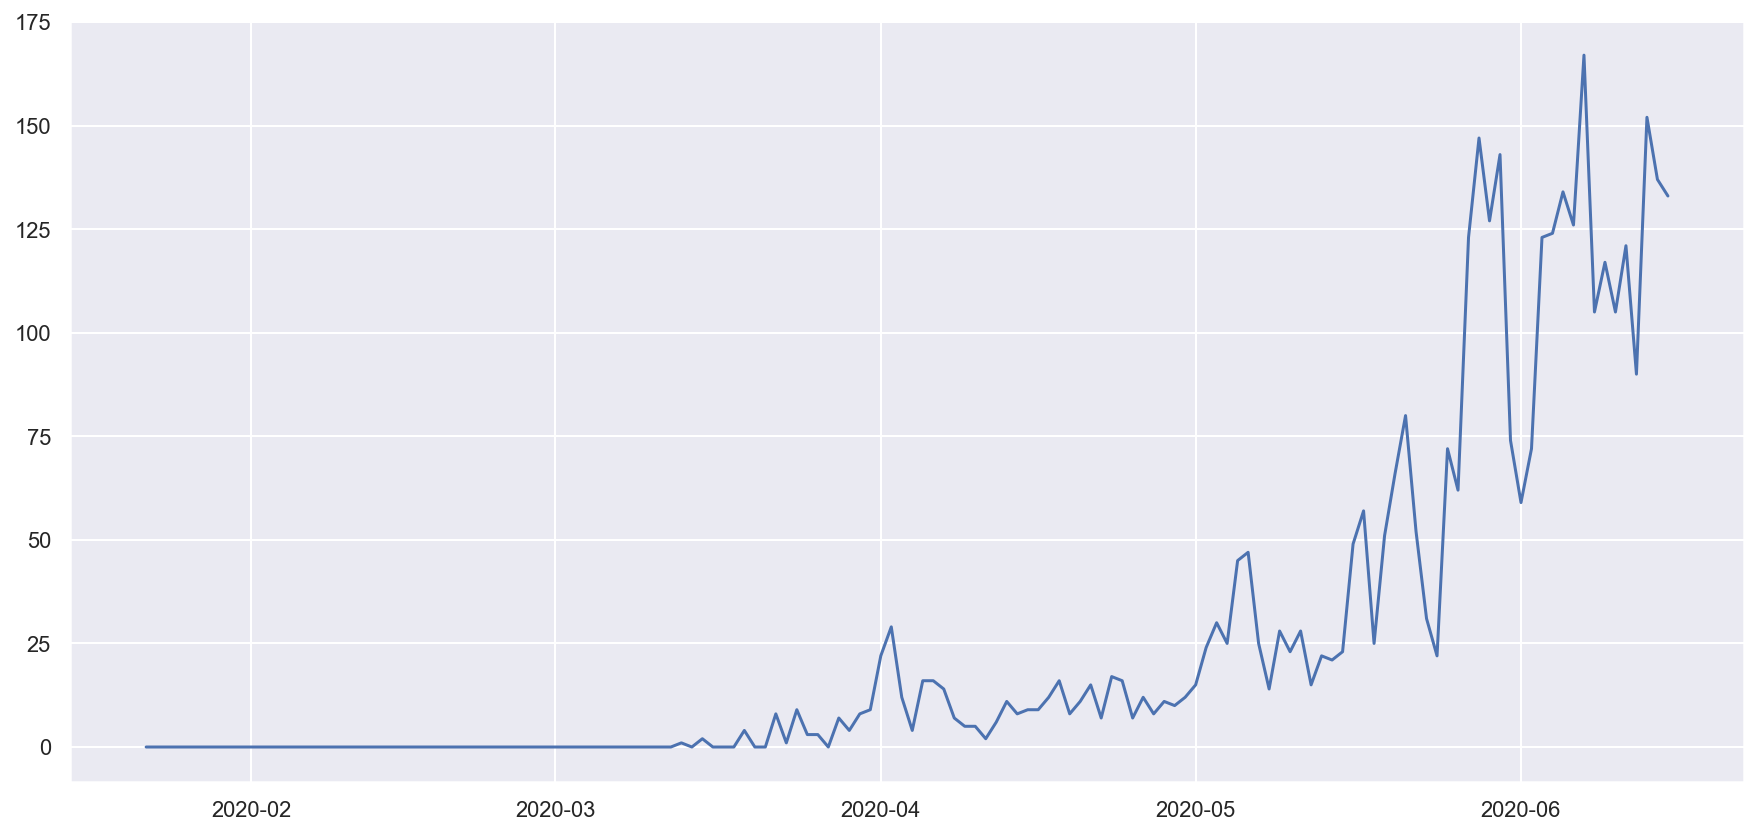

In [13]:
plt.figure(figsize=(15, 7))
plt.plot(df_kenya['daily_confirmed'])
plt.show()

In [14]:
df_kenya.tail(10)

,country,confirmed,deaths,recovered,daily_confirmed,daily_deaths,daily_recoveries
date,,,,,,,
2020-06-06,Kenya,2600,83,706,126,4,63
2020-06-07,Kenya,2767,84,752,167,1,46
2020-06-08,Kenya,2872,85,849,105,1,97
2020-06-09,Kenya,2989,88,873,117,3,24
2020-06-10,Kenya,3094,89,1048,105,1,175
2020-06-11,Kenya,3215,92,1092,121,3,44
2020-06-12,Kenya,3305,96,1164,90,4,72
2020-06-13,Kenya,3457,100,1221,152,4,57
2020-06-14,Kenya,3594,103,1253,137,3,32


In [15]:
df_kenya['daily_deaths'].sum()

104